Função Softmax 
==========

A funçãos softmax é importante, pois transforma valores ("scores", "logits") em probabilidades.
Nesse tutorial, iremos ver a definição da função softamx e como ela varia conforme os parâmetros de entrada.

Softmax
========

A função softmax transforma um conjunto de valores ("scores", "logits") e os transforma em probabilidades, de forma que a soma das probabilidades seja igual a 1. Ela é adequada para problemas de classificação com mais de uma classe.
$$softmax(\boldsymbol{S})_j = \frac{e^{s_j}}{\sum_{i=1}^{N}e^{s_i}}$$
$$\boldsymbol{S} = (s_1,s_2,...,s_N)$$

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from ipywidgets import * #Intsalar e setar no jupyter: jupyter nbextension enable --py widgetsnbextension


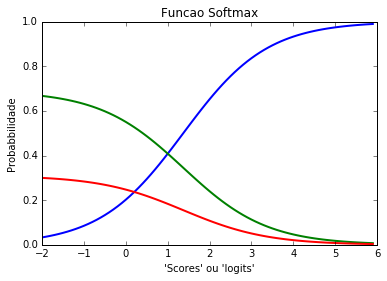

In [9]:
def softmax(S):
    E = np.exp(S)
    E/=E.sum(axis=-1,keepdims = True)
    return E

x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)]).T
psoftmax = softmax(scores)

plt.figure(figsize=(6,4))
plt.plot(x, psoftmax, linewidth=2)
plt.xlabel("'Scores' ou 'logits'")
plt.ylabel("Probabbilidade")
plt.title("Funcao Softmax")
plt.show()


Veja abaixo dois exemplos interativos do que acontece com a função softmax quando modificamos os valores dos scores.

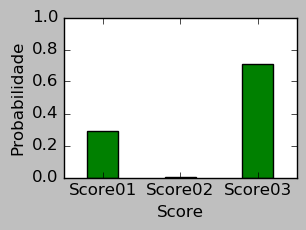

In [10]:
def plotmodel(s1,s2,s3):
    scores = np.array([[s1, s2, s3]])
    psoftmax2 = softmax(scores).ravel()
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(3, 2))
    people = ('Score01', 'Score02', 'Score03')
    x_pos = [2,4,6]
    ax.bar(x_pos, psoftmax2, align='center',color='green', ecolor='black')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(people)
    #ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_ylim([0,1])
    ax.set_xlabel('Score')
    ax.set_ylabel('Probabilidade')
    plt.show()
                       
interact(plotmodel,s1 = (1,10,.1),s2 = (1,10,.1),s3 = (1,10,.1))
                       


s1: 4.9
s2: 5.5
s3: 6.0


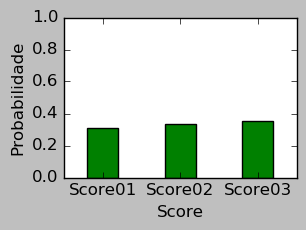

In [11]:
def plotmodel2(M, s1,op):
    scores = np.array([[s1, 5.5, 6]])
    print "s1:",scores[0,0]
    print "s2:",scores[0,1]
    print "s3:",scores[0,2]
    
    if op == 1:
        psoftmax2 = softmax(scores*M).ravel()
    else:
        psoftmax2 = softmax(scores/M).ravel()
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(3, 2))
    people = ('Score01', 'Score02', 'Score03')
    x_pos = [2,4,6]
    ax.bar(x_pos, psoftmax2, align='center',color='green', ecolor='black')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(people)
    #ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_ylim([0,1])
    ax.set_xlabel('Score')
    ax.set_ylabel('Probabilidade')
    plt.show()
                       
interact(plotmodel2,M = (1,10,1),s1 = (1,10,.1),op = {'Multiplication':1,'Division':2})
                       